### Installing dependencies

In [ ]:
# Nothing to do here

### Importing dependencies

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display
from matplotlib.patches import Patch

### Common Functions

In [ ]:
sns.set_theme(style="darkgrid")

def list_files_into_path(folder_path):
    folder_content = os.listdir(folder_path)
    folder_content.sort()
    return folder_content

def list_extract_values(list_to_extract, extract_key):
    extracted_values = []
    for item in list_to_extract:
        extracted_values.append(item.get(extract_key))
    return extracted_values

def individual_boxplot(dg_title, dg_data):
    df_scores = dg_data[['bleu_score', 'rouge_score']]
    # Criar subplots lado a lado
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Girar os boxplots em 90 graus e adicionar cores diferentes
    sns.boxplot(ax=axes[0], y=df_scores['bleu_score'], color='turquoise')
    axes[0].set_title('Bleu Score', fontsize=16)
    axes[0].set_ylabel('')
    axes[0].set_xlabel('Bleu Score', fontsize=14)
    axes[0].tick_params(axis='both', labelsize=12)
    axes[0].margins(y=0.1)

    sns.boxplot(ax=axes[1], y=df_scores['rouge_score'], color='slateblue')
    axes[1].set_title('Rouge Score', fontsize=16)
    axes[1].set_ylabel('')
    axes[1].set_xlabel('Rouge Score', fontsize=14)
    axes[1].tick_params(axis='both', labelsize=12)
    axes[1].margins(y=0.1)

    plt.suptitle(dg_title.replace('_', ' '), fontsize=18, y=1.05)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    print()

def comparative_boxplot(target_title, target_column, label_list, dataframe_list):
    dataframe_list = dataframe_list

    # Criar subplots lado a lado
    fig, axes_bleu = plt.subplots(1, len(dataframe_list), figsize=(12, 6), sharey=True)

    for i, df in enumerate(dataframe_list):
        sns.boxplot(ax=axes_bleu[i], y=df[target_column], color=f'C{i}', showfliers = False)
        axes_bleu[i].set_title(label_list[i].split('_')[1])
        axes_bleu[i].set_xlabel(label_list[i].split('_')[0])
        # axes_bleu[i].set_xlabel(label_list[i].split('_')[0], rotation=45)
        axes_bleu[i].set_ylabel(target_title)
        axes_bleu[i].tick_params(axis='both', labelsize=12)
        axes_bleu[i].margins(y=0.1)
        # axes_bleu[i].set_ylim(0, 1)

    plt.suptitle(f"{target_title} Comparison", fontsize=18, y=1.05)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    print()

### Main execution

In [ ]:
results_folder = '/content/drive/MyDrive/TCC/Partial Results'

df_data = []
results_files = list_files_into_path('/content/drive/MyDrive/TCC/Partial Results')

# Reordenação
results_files = [
    'Falcon7b_Caixa.csv',
    'Mixtral7b_Caixa.csv',
    'Falcon7b_FerreiraCosta.csv',
    'Mixtral7b_FerreiraCosta.csv',
    'Falcon7b_Mastercard.csv',
    'Mixtral7b_Mastercard.csv',
    'Falcon7b_Nubank.csv',
    'Mixtral7b_Nubank.csv'
]

for item in results_files:
    doc_name = item.split('.')[0]
    df = pd.read_csv(f"{results_folder}/{item}")
    df_data.append({
        'doc_name' : doc_name,
        'dataframe': df
        })

In [ ]:
for item in df_data:
    print(f"Document: {item['doc_name']}")
    print()
    display(item['dataframe'].describe())
    print()
    display(item['dataframe'].head())
    print()

Document: Falcon7b_Caixa



,bleu_score,rouge_score
count,48.000000,48.000000
mean,0.003213,0.249620
std,0.002239,0.211909
min,0.001249,0.000000
25%,0.001441,0.110360
50%,0.002232,0.183625
75%,0.004260,0.321833
max,0.008660,0.790698


,faq_question,faq_answers,generated_answers,bleu_score,rouge_score
0,o que e o caixa tem?,o caixa tem e um aplicativo da caixa criado pa...,o caixa é um aplicativo que foi criado para f...,0.006227,0.790698
1,como baixar o caixa tem?,"com o caixa tem, alem de receber o pagamento d...","o caixa tem acesso a um banco, onde é possíve...",0.008660,0.172414
2,quem pode ter uma conta digital caixa tem?,baixar o caixa tem e muito facil e qualquer pe...,quem pode ter uma conta digital caixa tem?\n\...,0.001565,0.052632
3,como abrir uma conta no caixa tem?,qualquer cidadao pode ter conta no caixa tem. ...,\n\n1. O caixa tem é um banco de dados que con...,0.001404,0.117647
4,nao reconheco os dados de acesso ao caixa tem....,voce precisa estar com um documento pessoal de...,\n\n1. O caixa não foi abastecido com o endere...,0.001408,0.071006



Document: Mixtral7b_Caixa



,bleu_score,rouge_score
count,48.000000,48.000000
mean,0.002662,0.062153
std,0.001078,0.040442
min,0.001238,0.000000
25%,0.001914,0.033523
50%,0.002512,0.055196
75%,0.002854,0.086025
max,0.007279,0.198758


,faq_question,faq_answers,generated_answers,bleu_score,rouge_score
0,o que e o caixa tem?,o caixa tem e um aplicativo da caixa criado pa...,O Caixinha TEM (Tudo em Mãos) refere-se ao ap...,0.002712,0.085714
1,como baixar o caixa tem?,"com o caixa tem, alem de receber o pagamento d...","Infelizemente não há uma opção para ""baiar"" (...",0.001883,0.050000
2,quem pode ter uma conta digital caixa tem?,baixar o caixa tem e muito facil e qualquer pe...,Qual quer persona possui un dispositivo móvel...,0.004290,0.079208
3,como abrir uma conta no caixa tem?,qualquer cidadao pode ter conta no caixa tem. ...,Para criarmos sua Conta Poupança Caixinha Dig...,0.003021,0.114286
4,nao reconheco os dados de acesso ao caixa tem....,voce precisa estar com um documento pessoal de...,Para recuperação dos seus códigos para entrad...,0.001879,0.096154



Document: Falcon7b_FerreiraCosta



,bleu_score,rouge_score
count,19.000000,19.000000
mean,0.003926,0.291396
std,0.003803,0.275835
min,0.000974,0.041667
25%,0.001347,0.102468
50%,0.002489,0.157895
75%,0.005405,0.441905
max,0.013011,1.000000


,faq_question,faq_answers,generated_answers,bleu_score,rouge_score
0,voces realizam entrega em apartamento?,"sim, entregamos seu pedido em andares superior...","sim, voces realizam entrega em apartamentos.\...",0.001340,0.067227
1,voces entregam com embalagem para presente?,"dispomos de embalagem para presente, para as c...","\n\nYes, we do offer gift wrapping services in...",0.005824,0.041667
2,qualquer pessoa pode receber o produto que eu ...,"o recebimento podera ser feito por porteiros, ...","não, o recebimento é feito apenas para quem f...",0.006712,0.142857
3,nao tenho quem receba meu produto no dia e hor...,"para entregas agendadas na loja fisica, voce d...",não tem problema. podemos encontrar um compro...,0.001229,0.187500
4,quais os tipos de entrega oferecidos pela ferr...,entrega convencional: compre no site ou na loj...,\n\n1. entrega convencional: compre no site ou...,0.001492,0.337209



Document: Mixtral7b_FerreiraCosta



,bleu_score,rouge_score
count,19.000000,19.000000
mean,0.003507,0.059066
std,0.001250,0.038808
min,0.001513,0.000000
25%,0.002533,0.029857
50%,0.003192,0.043956
75%,0.004288,0.089282
max,0.005863,0.127273


,faq_question,faq_answers,generated_answers,bleu_score,rouge_score
0,voces realizam entrega em apartamento?,"sim, entregamos seu pedido em andares superior...",Sim! Entretanto somos limitados ao transporte...,0.005412,0.067797
1,voces entregam com embalagem para presente?,"dispomos de embalagem para presente, para as c...",Infelizemente não podemos enviar sua encomend...,0.004300,0.036364
2,qualquer pessoa pode receber o produto que eu ...,"o recebimento podera ser feito por porteiros, ...","Sim, mas esssa persona precisa estar presente...",0.003390,0.030303
3,nao tenho quem receba meu produto no dia e hor...,"para entregas agendadas na loja fisica, voce d...",Para uma encomenda feita através do nosso web...,0.002640,0.122449
4,quais os tipos de entrega oferecidos pela ferr...,entrega convencional: compre no site ou na loj...,A Ferreiro Costa Oferece três opções para env...,0.004275,0.100000



Document: Falcon7b_Mastercard



,bleu_score,rouge_score
count,225.000000,225.000000
mean,0.003811,0.277872
std,0.006666,0.207023
min,0.001015,0.000000
25%,0.001302,0.142077
50%,0.002059,0.218487
75%,0.004221,0.378378
max,0.064558,1.000000


,faq_question,faq_answers,generated_answers,bleu_score,rouge_score
0,trabalho na policia e estou investiganndo um c...,"por favor, envie email para nosso centro de ap...",contate o centro de apoio a fraud prevention ...,0.004089,0.404762
1,o que e o apple pay?,"o apple pay e uma solucao de pagamento movel, ...",o apple pay é um sistema de pagamento que foi...,0.003122,0.340136
2,existe algum tipo de cobranca ou custo para ut...,nao. para utilizar o apple pay nao existe nenh...,não.,0.064558,0.125000
3,onde posso pagar com apple pay?,o apple pay pode ser usado nas suas compras em...,você pode pagar com apple pay em todas as com...,0.006835,0.428571
4,quais aparelhos sao compativeis com apple pay?,o apple pay e compativel com o iphone 6 e mode...,os aparelhos sao compativeis com apple pay qu...,0.008777,0.141176



Document: Mixtral7b_Mastercard



,bleu_score,rouge_score
count,225.000000,225.000000
mean,0.002778,0.078399
std,0.001156,0.067422
min,0.001034,0.000000
25%,0.001958,0.039216
50%,0.002469,0.062500
75%,0.003377,0.095238
max,0.008145,0.444444


,faq_question,faq_answers,generated_answers,bleu_score,rouge_score
0,trabalho na policia e estou investiganndo um c...,"por favor, envie email para nosso centro de ap...",Você pode entrare em contato conosco através ...,0.001708,0.103093
1,o que e o apple pay?,"o apple pay e uma solucao de pagamento movel, ...",O Apple Pay is an mobile payment solution dev...,0.002389,0.051613
2,existe algum tipo de cobranca ou custo para ut...,nao. para utilizar o apple pay nao existe nenh...,Não há qualquer tarifa associada ao uso do Ap...,0.005037,0.146341
3,onde posso pagar com apple pay?,o apple pay pode ser usado nas suas compras em...,Você consegue utilizar Apple Pay para realiza...,0.002872,0.166667
4,quais aparelhos sao compativeis com apple pay?,o apple pay e compativel com o iphone 6 e mode...,O Apple Pay funciona nos iPhones lançamentod ...,0.001616,0.135593



Document: Falcon7b_Nubank



,bleu_score,rouge_score
count,66.000000,66.000000
mean,0.002940,0.345888
std,0.002279,0.267057
min,0.001128,0.062500
25%,0.001496,0.160887
50%,0.001664,0.204981
75%,0.003528,0.535922
max,0.011840,0.976077


,faq_question,faq_answers,generated_answers,bleu_score,rouge_score
0,o que e a conta do nubank?,"a conta do nubank e a nossa conta digital e, a...",a conta do nubank é uma conta de banco digita...,0.002852,0.255319
1,vou precisar passar por algum tipo de analise?,para ter uma conta do nubank nao e preciso pas...,"não, nao precisa de nenhuma analise de credit...",0.005938,0.329412
2,nao tem nenhuma tarifa?,"a conta do nubank nao tem anuidade, voce nao p...",\n\nNubank não tem anuidade. O cliente só paga...,0.001252,0.214559
3,como faco para ter meu cartao com a funcao de ...,a funcao debito esta disponivel para todos os ...,\n\n1. Para pedir a habilitação do cartão de d...,0.001661,0.455224
4,posso fazer saques com a minha conta do nubank?,nossos clientes podem sacar com a funcao debit...,"sim, você pode fazer saques com a sua conta d...",0.011840,0.062500



Document: Mixtral7b_Nubank



,bleu_score,rouge_score
count,66.000000,66.000000
mean,0.002291,0.091390
std,0.000932,0.080216
min,0.001163,0.000000
25%,0.001625,0.043494
50%,0.002042,0.070175
75%,0.002685,0.114946
max,0.006220,0.436975


,faq_question,faq_answers,generated_answers,bleu_score,rouge_score
0,o que e a conta do nubank?,"a conta do nubank e a nossa conta digital e, a...",A Conta NuBanké uma carteIRA digitale projeta...,0.002473,0.041667
1,vou precisar passar por algum tipo de analise?,para ter uma conta do nubank nao e preciso pas...,Não há necessidade em se submeter ao processa...,0.001519,0.062500
2,nao tem nenhuma tarifa?,"a conta do nubank nao tem anuidade, voce nao p...",Não há taxação associadas diretamente em rela...,0.001733,0.093960
3,como faco para ter meu cartao com a funcao de ...,a funcao debito esta disponivel para todos os ...,Para obter uma NuCard (cartão) ativando-os fu...,0.001495,0.063241
4,posso fazer saques com a minha conta do nubank?,nossos clientes podem sacar com a funcao debit...,Sim! Com sua Conta Digital NúBank (conforméme...,0.002271,0.038961


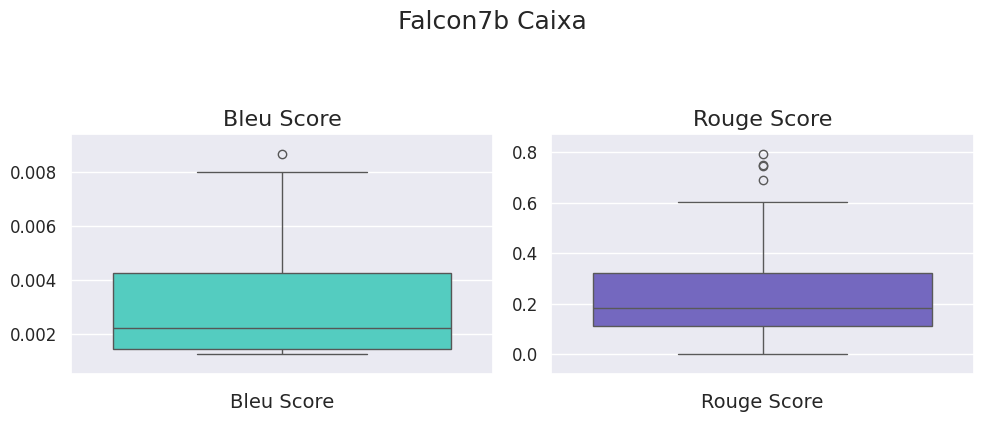

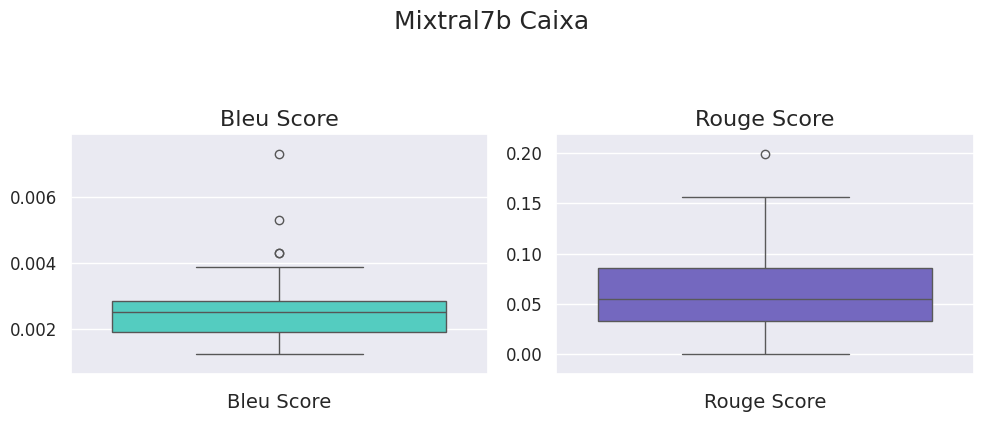

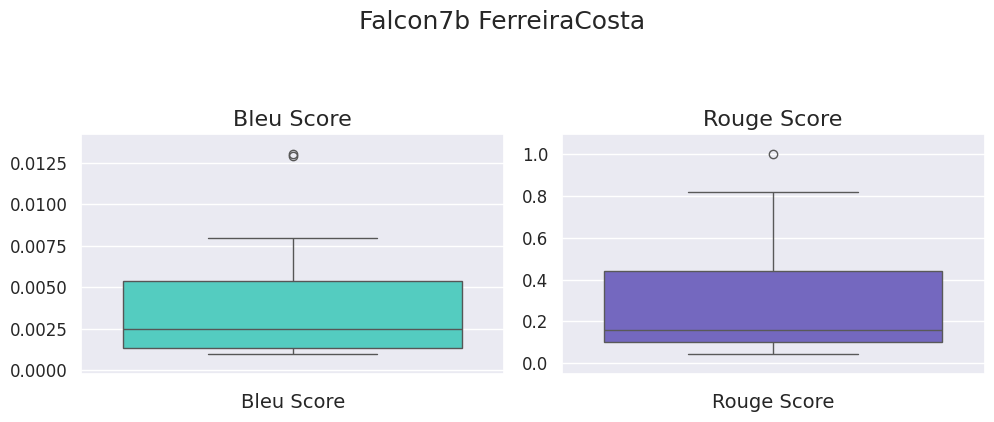

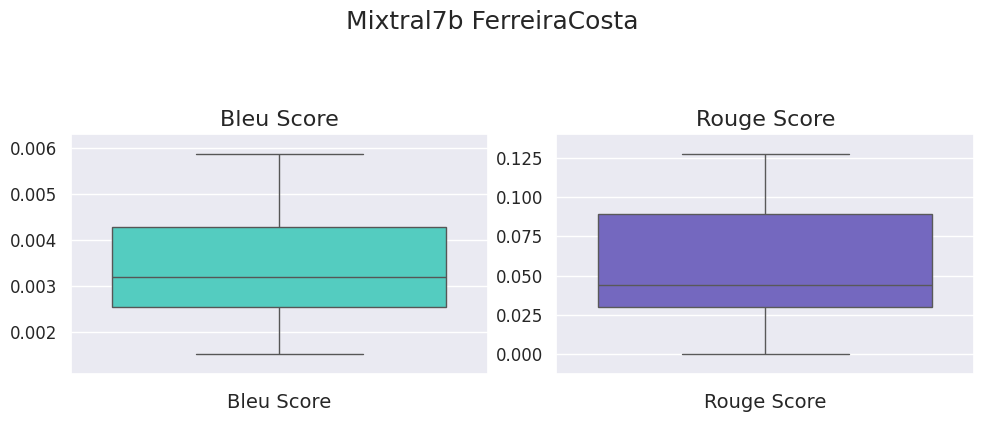

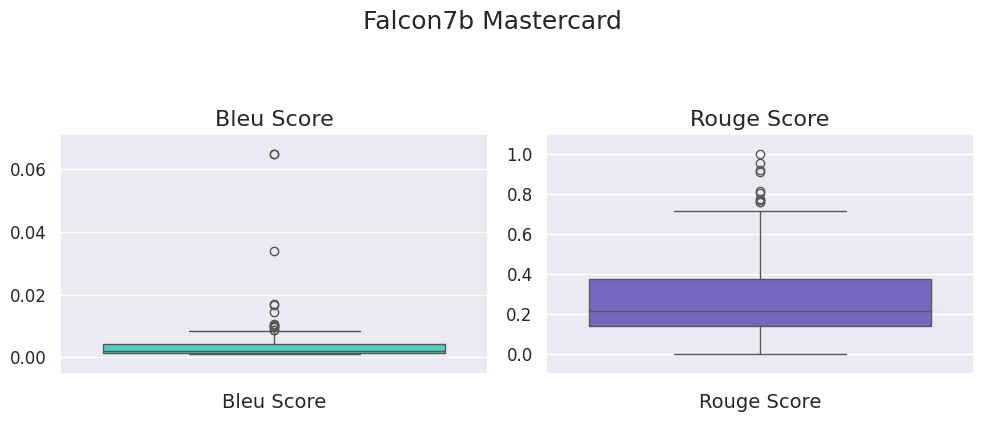

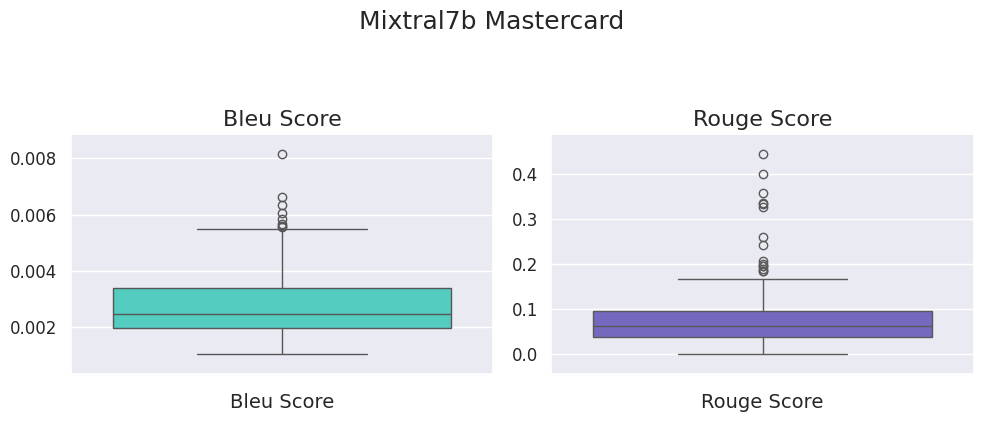

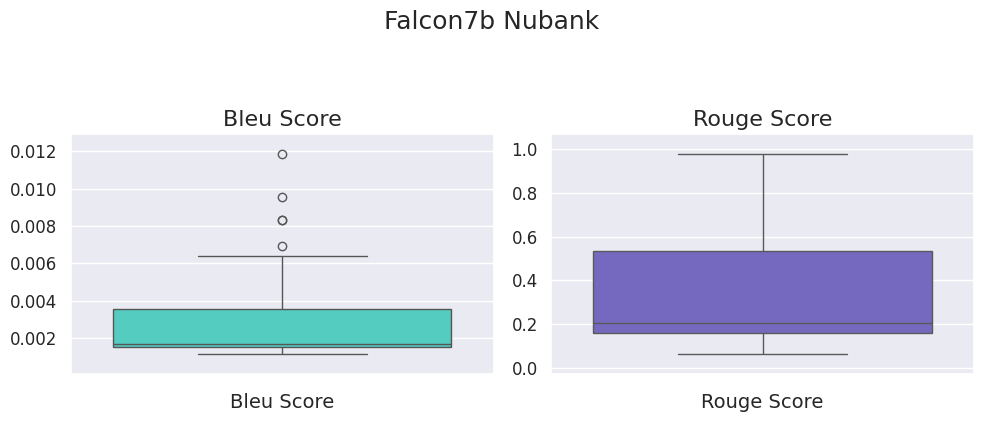

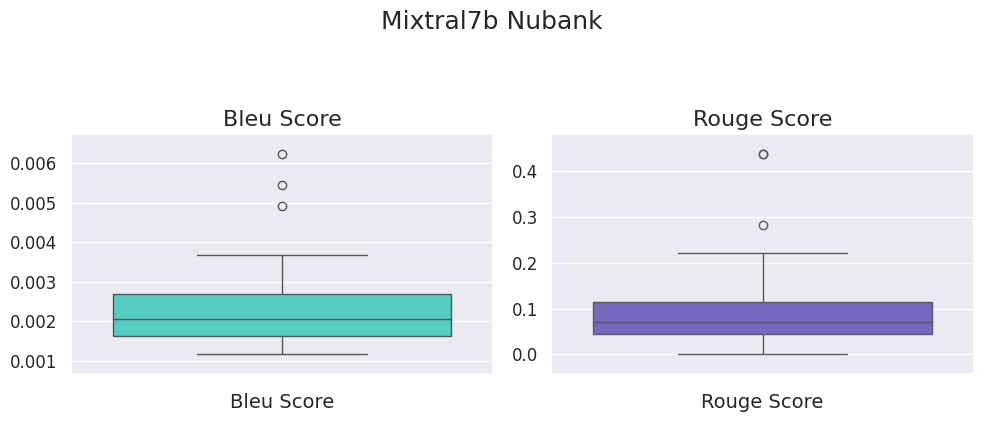

In [ ]:
for item in df_data:
    individual_boxplot(item['doc_name'], item['dataframe'])

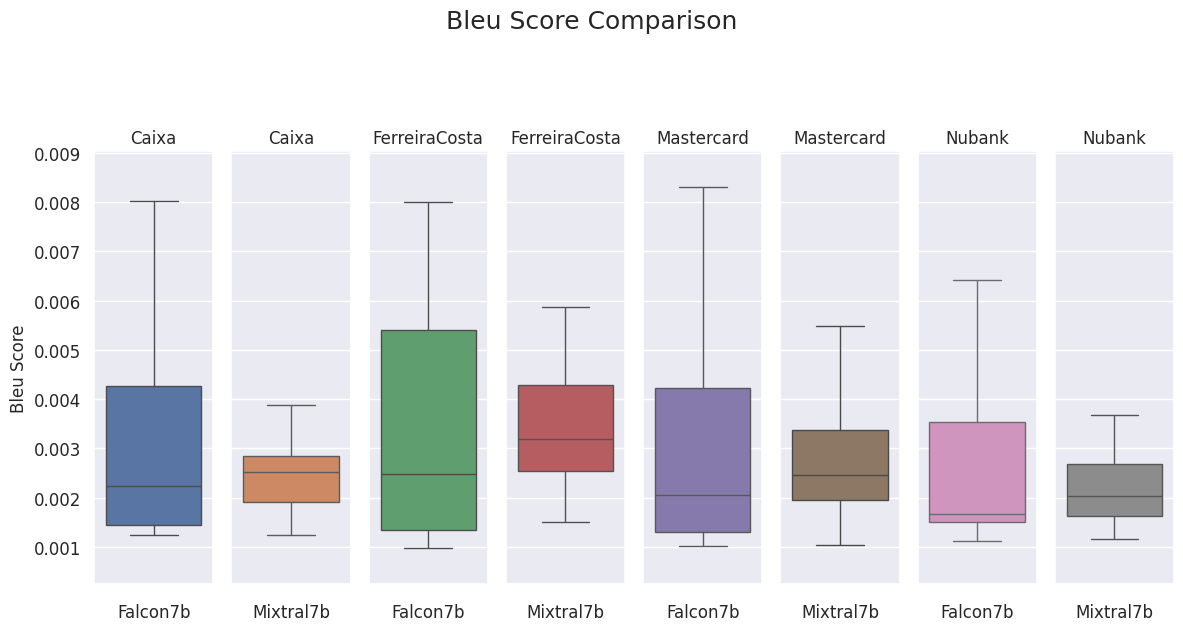

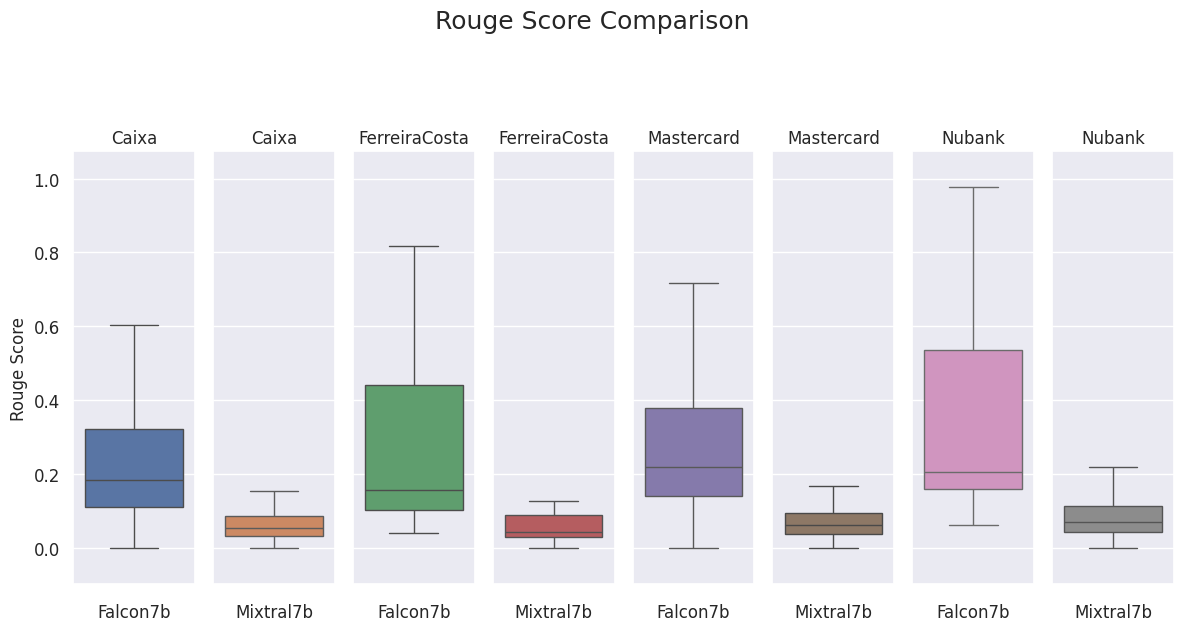

In [ ]:
label_list = list_extract_values(df_data, 'doc_name')
dataframe_list = list_extract_values(df_data, 'dataframe')

comparative_boxplot('Bleu Score','bleu_score', label_list, dataframe_list)
comparative_boxplot('Rouge Score','rouge_score', label_list, dataframe_list)

In [ ]:
# df = pd.read_csv("/content/drive/MyDrive/TCC/Partial Results/Mixtral7b_FerreiraCosta.csv")
# df = pd.read_csv("/content/drive/MyDrive/TCC/Partial Results/Falcon7b_FerreiraCosta.csv")
# df = pd.read_csv("/content/drive/MyDrive/TCC/Partial Results/Mixtral7b_Caixa.csv")
# df = pd.read_csv("/content/drive/MyDrive/TCC/Partial Results/Falcon7b_Caixa.csv")
# df = pd.read_csv("/content/drive/MyDrive/TCC/Partial Results/Mixtral7b_Nubank.csv")
df = pd.read_csv("/content/drive/MyDrive/TCC/Partial Results/Falcon7b_Nubank.csv")
# df = pd.read_csv("/content/drive/MyDrive/TCC/Partial Results/Mixtral7b_Mastercard.csv")
# df = pd.read_csv("/content/drive/MyDrive/TCC/Partial Results/Falcon7b_Mastercard.csv")

In [ ]:
df.describe()

,bleu_score,rouge_score
count,48.000000,48.000000
mean,0.003213,0.249620
std,0.002239,0.211909
min,0.001249,0.000000
25%,0.001441,0.110360
50%,0.002232,0.183625
75%,0.004260,0.321833
max,0.008660,0.790698


In [ ]:
df

,faq_question,faq_answers,generated_answers,bleu_score,rouge_score
0,o que e a conta do nubank?,"a conta do nubank e a nossa conta digital e, a...",a conta do nubank é uma conta de banco digita...,0.002852,0.255319
1,vou precisar passar por algum tipo de analise?,para ter uma conta do nubank nao e preciso pas...,"não, nao precisa de nenhuma analise de credit...",0.005938,0.329412
2,nao tem nenhuma tarifa?,"a conta do nubank nao tem anuidade, voce nao p...",\n\nNubank não tem anuidade. O cliente só paga...,0.001252,0.214559
3,como faco para ter meu cartao com a funcao de ...,a funcao debito esta disponivel para todos os ...,\n\n1. Para pedir a habilitação do cartão de d...,0.001661,0.455224
4,posso fazer saques com a minha conta do nubank?,nossos clientes podem sacar com a funcao debit...,"sim, você pode fazer saques com a sua conta d...",0.011840,0.062500
...,...,...,...,...,...
61,nao estou encontrando o seguro de vida no meu ...,a liberacao esta sendo feita gradualmente para...,voce pode encontrar o seguro de vida no aplic...,0.002219,0.386555
62,como faco para cadastrar uma conta em debito a...,se voce quer cadastrar sua primeira conta no d...,"\n\n1. Clique no botao ""debito automatico"" na ...",0.001664,0.738462
63,recebi um link de redefinicao de senha que nao...,se voce recebeu um email com um link de redefi...,se voce recebeu um link de redefinicao de sen...,0.001629,0.656716
64,recebi um codigo de acesso ao app que nao soli...,toda vez que voce acessa sua conta de um novo ...,se voce recebeu um codigo de acesso solicitad...,0.001448,0.747405


In [ ]:
total_describe = pd.DataFrame()

for i, df in enumerate(dataframe_list):
    single_describe = df.describe().T
    single_describe['Dataset'] = label_list[i]
    total_describe = pd.concat([total_describe, single_describe])

total_describe

,count,mean,std,min,25%,50%,75%,max,Dataset
bleu_score,48.0,0.003213,0.002239,0.001249,0.001441,0.002232,0.004260,0.008660,Falcon7b_Caixa
rouge_score,48.0,0.249620,0.211909,0.000000,0.110360,0.183625,0.321833,0.790698,Falcon7b_Caixa
bleu_score,48.0,0.002662,0.001078,0.001238,0.001914,0.002512,0.002854,0.007279,Mixtral7b_Caixa
rouge_score,48.0,0.062153,0.040442,0.000000,0.033523,0.055196,0.086025,0.198758,Mixtral7b_Caixa
bleu_score,19.0,0.003926,0.003803,0.000974,0.001347,0.002489,0.005405,0.013011,Falcon7b_FerreiraCosta
rouge_score,19.0,0.291396,0.275835,0.041667,0.102468,0.157895,0.441905,1.000000,Falcon7b_FerreiraCosta
bleu_score,19.0,0.003507,0.001250,0.001513,0.002533,0.003192,0.004288,0.005863,Mixtral7b_FerreiraCosta
rouge_score,19.0,0.059066,0.038808,0.000000,0.029857,0.043956,0.089282,0.127273,Mixtral7b_FerreiraCosta
bleu_score,225.0,0.003811,0.006666,0.001015,0.001302,0.002059,0.004221,0.064558,Falcon7b_Mastercard
rouge_score,225.0,0.277872,0.207023,0.000000,0.142077,0.218487,0.378378,1.000000,Falcon7b_Mastercard


In [ ]:
total_describe = pd.DataFrame()

for i, df in enumerate(dataframe_list):
    single_describe = df['bleu_score'].describe().rename(label_list[i])
    total_describe = pd.concat([total_describe, single_describe], axis=1)

total_describe

,Falcon7b_Caixa,Mixtral7b_Caixa,Falcon7b_FerreiraCosta,Mixtral7b_FerreiraCosta,Falcon7b_Mastercard,Mixtral7b_Mastercard,Falcon7b_Nubank,Mixtral7b_Nubank
count,48.000000,48.000000,19.000000,19.000000,225.000000,225.000000,66.000000,66.000000
mean,0.003213,0.002662,0.003926,0.003507,0.003811,0.002778,0.002940,0.002291
std,0.002239,0.001078,0.003803,0.001250,0.006666,0.001156,0.002279,0.000932
min,0.001249,0.001238,0.000974,0.001513,0.001015,0.001034,0.001128,0.001163
25%,0.001441,0.001914,0.001347,0.002533,0.001302,0.001958,0.001496,0.001625
50%,0.002232,0.002512,0.002489,0.003192,0.002059,0.002469,0.001664,0.002042
75%,0.004260,0.002854,0.005405,0.004288,0.004221,0.003377,0.003528,0.002685
max,0.008660,0.007279,0.013011,0.005863,0.064558,0.008145,0.011840,0.006220


In [ ]:
total_describe = pd.DataFrame()

for i, df in enumerate(dataframe_list):
    single_describe = df['rouge_score'].describe().rename(label_list[i])
    total_describe = pd.concat([total_describe, single_describe], axis=1)

total_describe

,Falcon7b_Caixa,Mixtral7b_Caixa,Falcon7b_FerreiraCosta,Mixtral7b_FerreiraCosta,Falcon7b_Mastercard,Mixtral7b_Mastercard,Falcon7b_Nubank,Mixtral7b_Nubank
count,48.000000,48.000000,19.000000,19.000000,225.000000,225.000000,66.000000,66.000000
mean,0.249620,0.062153,0.291396,0.059066,0.277872,0.078399,0.345888,0.091390
std,0.211909,0.040442,0.275835,0.038808,0.207023,0.067422,0.267057,0.080216
min,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.062500,0.000000
25%,0.110360,0.033523,0.102468,0.029857,0.142077,0.039216,0.160887,0.043494
50%,0.183625,0.055196,0.157895,0.043956,0.218487,0.062500,0.204981,0.070175
75%,0.321833,0.086025,0.441905,0.089282,0.378378,0.095238,0.535922,0.114946
max,0.790698,0.198758,1.000000,0.127273,1.000000,0.444444,0.976077,0.436975


In [ ]:
result = pd.concat([item['dataframe'] for item in df_data])

In [ ]:
result

,faq_question,faq_answers,generated_answers,bleu_score,rouge_score
0,o que e o caixa tem?,o caixa tem e um aplicativo da caixa criado pa...,o caixa é um aplicativo que foi criado para f...,0.006227,0.790698
1,como baixar o caixa tem?,"com o caixa tem, alem de receber o pagamento d...","o caixa tem acesso a um banco, onde é possíve...",0.008660,0.172414
2,quem pode ter uma conta digital caixa tem?,baixar o caixa tem e muito facil e qualquer pe...,quem pode ter uma conta digital caixa tem?\n\...,0.001565,0.052632
3,como abrir uma conta no caixa tem?,qualquer cidadao pode ter conta no caixa tem. ...,\n\n1. O caixa tem é um banco de dados que con...,0.001404,0.117647
4,nao reconheco os dados de acesso ao caixa tem....,voce precisa estar com um documento pessoal de...,\n\n1. O caixa não foi abastecido com o endere...,0.001408,0.071006
...,...,...,...,...,...
61,nao estou encontrando o seguro de vida no meu ...,a liberacao esta sendo feita gradualmente para...,Para obter mais cedo as novidades sobre nosso...,0.003327,0.119048
62,como faco para cadastrar uma conta em debito a...,se voce quer cadastrar sua primeira conta no d...,Para criaruma novaconteem débiotomáticolodoNU...,0.001751,0.021277
63,recebi um link de redefinicao de senha que nao...,se voce recebeu um email com um link de redefi...,Se não foi VOCÊ quen pediu uma reinicialação ...,0.001565,0.043011
64,recebi um codigo de acesso ao app que nao soli...,toda vez que voce acessa sua conta de um novo ...,Se recibiu un códigode accesoalappque nãosoli...,0.002140,0.034483
